# Tutorial on the free energy


In this tutorial we seek to determine the free energy graph of secondary RNA structure using non-redundant sampling.

Install: 
* Vienna RNA Package (https://www.tbi.univie.ac.at/RNA/) from source
* Python : pandas, numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
seq = 'AGUAACAAUAGCAAAAGGGAUCACCUGAAUCCAUUCCGA' # RNA sequence

## 1. Determine the min and the max for free energy from 1000 NR samples

In [3]:
from simulation import sample_from_vienna

df_samples = sample_from_vienna(seq, 1000, 'NR') # Produce 1000 NR samples (using Vienna RNA)
df_samples.head()

Structure     Proba
0  ..............(..(((((....).))))..)....  0.003712
1  ...............(((.....))).............  0.131769
2  ................(((.((....)).))).......  0.112034
3  ................(((((...........)))))..  0.042321
4  .((.......)).....((((.......)))).......  0.006039

In [4]:
from estimator import add_feature
from utils import structure_energy

def feature_1(bra, arg_f):

    """ Return the free energy of the structure """

    seq = arg_f[0]

    return structure_energy(seq, bra)

In [5]:
df_f1 = add_feature(df_samples, feature_1, [seq])
df_f1.head()

Feature     Proba
0     -0.6  0.003712
1     -2.8  0.131769
2     -2.7  0.112034
3     -2.1  0.042321
4     -0.9  0.006039

In [6]:
min_e = df_f1['Feature'].min() # Min free energy of the set of NR samples
max_e = df_f1['Feature'].max() # Max free energy of the set of NR samples

print(' - Min free energy:', min_e)
print(' - Max free energy:', max_e)

 - Min free energy: -2.8
 - Max free energy: 10.3


**Exercice** : determine the min and the max free energy from 1000 R samples. What do you remak ?

In [7]:
# Exercice

## 2.  Estimate the mean of free energy ##

In [8]:
from simulation import sample_number_recommend

error = 0.5
alpha = 0.1
m = int(sample_number_recommend(error, alpha, (min_e - 1, max_e  + 1)))

print('Number of recommended samples for an allowed error of', error, 'and a level of confidence', alpha, ':', m)

Number of recommended samples for an allowed error of 0.5 and a level of confidence 0.1 : 1367


In [9]:
df_samples = sample_from_vienna(seq, m, 'NR') # Produce m NR samples
df_f1 = add_feature(df_samples, feature_1, [seq])

In [10]:
from estimator import mean_estimator_nr

est_mean_f1 = mean_estimator_nr(df_f1)
print('Mean estimation of the free energy:', est_mean_f1)

Mean estimation of the free energy: -1.640957062994644


**Exercice** : determine the mean of the free energy using R samples.

In [11]:
# Exercice

## 3. Graph of energy

In [12]:
def feature_2(bra, arg_f):

    seq = arg_f[0]
    min_fe = arg_f[1]
    max_fe = arg_f[2]

    e = structure_energy(seq, bra)

    size_vector = abs(int(max_fe - min_fe))
    vector = np.zeros(size_vector)

    if e < min_fe or e > max_fe:
        return vector

    i = int(e) - min_fe
    vector[i] = 1.0

    return vector

In [13]:
arg = [seq, int(min_e) - 1, int(max_e) + 1]
df_f2 = add_feature(df_samples, feature_2, arg)

In [14]:
est_mean_f2 = mean_estimator_nr(df_f2)
est_mean_f2

array([0.00000000e+00, 5.76908584e-01, 1.64698972e-01, 1.97412316e-01,
       3.47410494e-02, 1.51686564e-02, 6.55425119e-03, 3.24056322e-03,
       8.62470898e-04, 1.97743582e-04, 6.60206305e-05, 1.29088509e-04,
       2.02841764e-05, 0.00000000e+00])

Plot the distribution

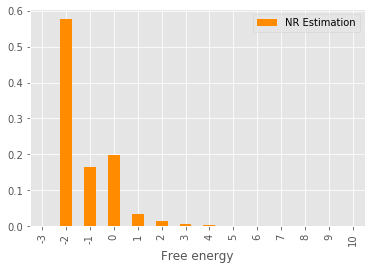

In [15]:
from utils import estimator_color

df_result = pd.DataFrame({'NR Estimation': est_mean_f2}, index=range(int(min_e) - 1, int(max_e)+ 1))
df_result.index.name = 'Free energy'

df_result.plot.bar(color=estimator_color[1])

In [16]:
# Exercice : redefine feature_f2 in order to ...